In [1]:
# First, please follow "README.md" for all the preparation for running the code
# Setup
from dolo import *
import dolark 
from dolark import HModel # The model is written in yaml file, HModel is used to read the yaml file
from dolark.equilibrium import find_steady_state
from dolark.perturbation import perturb
from dolo import time_iteration, improved_time_iteration
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#HModel reads the yaml file
aggmodel = HModel('Aiyagari.yaml')
aggmodel


In [3]:
# check features of the model
aggmodel.features 

{'ex-ante-identical': True,
 'conditional-processes': False,
 'iid-shocks': False}

In [4]:
eq = find_steady_state(aggmodel)
eq

Computing Initial Initial Rule... 

    calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


done
Computing Steady State...done


In [5]:
# You can also check the steady state values of all variables
eq.as_df()

i_m         r         w         e             a             μ  \
0   0.0  0.030442  1.244046 -0.648886 -1.000000e-10  1.537294e-01   
1   0.0  0.030442  1.244046 -0.648886  6.896552e+00  6.660702e-02   
2   0.0  0.030442  1.244046 -0.648886  1.379310e+01  2.084279e-02   
3   0.0  0.030442  1.244046 -0.648886  2.068966e+01  6.928995e-03   
4   0.0  0.030442  1.244046 -0.648886  2.758621e+01  1.666539e-03   
5   0.0  0.030442  1.244046 -0.648886  3.448276e+01  2.228881e-04   
6   0.0  0.030442  1.244046 -0.648886  4.137931e+01  2.319558e-06   
7   0.0  0.030442  1.244046 -0.648886  4.827586e+01 -1.710984e-16   
8   0.0  0.030442  1.244046 -0.648886  5.517241e+01 -1.555126e-16   
9   0.0  0.030442  1.244046 -0.648886  6.206897e+01 -1.429016e-16   
10  0.0  0.030442  1.244046 -0.648886  6.896552e+01 -1.324010e-16   
11  0.0  0.030442  1.244046 -0.648886  7.586207e+01 -1.234564e-16   
12  0.0  0.030442  1.244046 -0.648886  8.275862e+01 -1.156883e-16   
13  0.0  0.030442  1.244046 -0.648886  8.965517e+01 -1.088210e-16   
14  0.0  0.030442  1.244046 -0.648886  9.655172e+01 -1.026424e-16   
15  0.0  0.030442  1.244046 -0.648886  1.034483e+02 -9.697869e-17   
16  0.0  0.030442  1.244046 -0.648886  1.103448e+02 -9.167847e-17   
17  0.0  0.030442  1.244046 -0.648886  1.172414e+02 -8.660158e-17   
18  0.0  0.030442  1.244046 -0.648886  1.241379e+02 -8.161099e-17   
19  0.0  0.030442  1.244046 -0.648886  1.310345e+02 -7.656730e-17   
20  0.0  0.030442  1.244046 -0.648886  1.379310e+02 -7.132570e-17   
21  0.0  0.030442  1.244046 -0.648886  1.448276e+02 -6.573595e-17   
22  0.0  0.030442  1.244046 -0.648886  1.517241e+02 -5.964706e-17   
23  0.0  0.030442  1.244046 -0.648886  1.586207e+02 -5.291893e-17   
24  0.0  0.030442  1.244046 -0.648886  1.655172e+02 -4.544511e-17   
25  0.0  0.030442  1.244046 -0.648886  1.724138e+02 -3.719270e-17   
26  0.0  0.030442  1.244046 -0.648886  1.793103e+02 -2.826817e-17   
27  0.0  0.030442  1.244046 -0.648886  1.862069e+02 -1.902259e-17   
28  0.0  0.030442  1.244046 -0.648886  1.931034e+02 -1.021482e-17   
29  0.0  0.030442  1.244046 -0.648886  2.000000e+02 -3.260196e-18   
..  ...       ...       ...       ...           ...           ...   
60  2.0  0.030442  1.244046  0.648886 -1.000000e-10  5.684871e-02   
61  2.0  0.030442  1.244046  0.648886  6.896552e+00  8.688878e-02   
62  2.0  0.030442  1.244046  0.648886  1.379310e+01  6.171790e-02   
63  2.0  0.030442  1.244046  0.648886  2.068966e+01  3.152498e-02   
64  2.0  0.030442  1.244046  0.648886  2.758621e+01  1.092678e-02   
65  2.0  0.030442  1.244046  0.648886  3.448276e+01  2.067961e-03   
66  2.0  0.030442  1.244046  0.648886  4.137931e+01  2.489570e-05   
67  2.0  0.030442  1.244046  0.648886  4.827586e+01 -1.951842e-16   
68  2.0  0.030442  1.244046  0.648886  5.517241e+01 -1.749350e-16   
69  2.0  0.030442  1.244046  0.648886  6.206897e+01 -1.590655e-16   
70  2.0  0.030442  1.244046  0.648886  6.896552e+01 -1.462128e-16   
71  2.0  0.030442  1.244046  0.648886  7.586207e+01 -1.355569e-16   
72  2.0  0.030442  1.244046  0.648886  8.275862e+01 -1.265752e-16   
73  2.0  0.030442  1.244046  0.648886  8.965517e+01 -1.189237e-16   
74  2.0  0.030442  1.244046  0.648886  9.655172e+01 -1.123731e-16   
75  2.0  0.030442  1.244046  0.648886  1.034483e+02 -1.067754e-16   
76  2.0  0.030442  1.244046  0.648886  1.103448e+02 -1.020446e-16   
77  2.0  0.030442  1.244046  0.648886  1.172414e+02 -9.814871e-17   
78  2.0  0.030442  1.244046  0.648886  1.241379e+02 -9.510870e-17   
79  2.0  0.030442  1.244046  0.648886  1.310345e+02 -9.300414e-17   
80  2.0  0.030442  1.244046  0.648886  1.379310e+02 -9.198672e-17   
81  2.0  0.030442  1.244046  0.648886  1.448276e+02 -9.230376e-17   
82  2.0  0.030442  1.244046  0.648886  1.517241e+02 -9.433531e-17   
83  2.0  0.030442  1.244046  0.648886  1.586207e+02 -9.865160e-17   
84  2.0  0.030442  1.244046  0.648886  1.655172e+02 -1.060989e-16   
85  2.0  0.030442  1.244046  0.648886  1.724138e+02 -1.179287e-16   
86

In [6]:
# define the dataframe
df = eq.as_df()

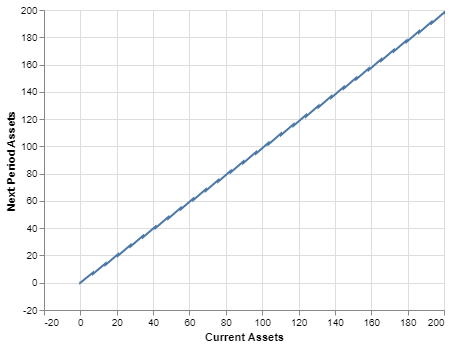

In [7]:
# plot relationship between assets of this period and of next period  
# altair plots a graph
import altair as alt
import pandas as pd

df = eq.as_df()
alt.Chart(df).mark_line().encode(
    x = alt.X('a', axis = alt.Axis(title='Current Assets')),
    y = alt.Y('i', axis=alt.Axis(title='Next Period Assets'))
)

In [8]:
# extract variables from the steady state solution
a = df['a']
r = df['r']
w = df['w']
e = df['e']
i = df['i']
μ = df['μ']

In [9]:
# calculate consumption
c = [(1+r[j])*a[j] + w[j]*np.exp(e[j]) - i[j] for j in range(len(df))]

# calcualte income 
income = [(r[j]+0.08)*a[j] + w[j]*np.exp(e[j]) for j in range(len(df))]

In [10]:
# aggregate consumption and cinome
agg_c = np.inner(c,μ)
agg_inc = np.inner(income,μ)

In [11]:
print(agg_c)
print(agg_inc)

1.572544082186627
2.0794337124921487


In [12]:
saving = 1 - agg_c/agg_inc
saving

0.2437633030860249

In [13]:
# Check the calibration of aggregate part of the model 
aggmodel.calibration      

{'exogenous': array([0.]),
 'aggregate': array([40.]),
 'parameters': array([1.  , 0.36, 0.08, 1.  , 0.9 ])}

In [14]:
# Check the calibration of the individual part of the model
aggmodel.model.calibration    

{'states': array([1.]),
 'exogenous': array([-0.04603872,  2.41502467,  0.        ]),
 'parameters': array([9.6e-01, 1.0e-10, 1.0e+00, 2.0e+02, 9.0e-01, 2.0e-01]),
 'controls': array([1.]),
 'auxiliaries': array([2.36898595])}

In [15]:
# Calculate the saving rate in the steady state under all kinds of calibrations
rows = []
rho_values = np.linspace(0, 0.9, 4)   #change serial correlation coefficent "rho "in {0, 0.3, 0.6, 0.9}
sig_values = np.linspace(0.2, 0.4, 2) #change the variance of labor shocks "sig" in {0.2, 0.4}
epsilon_values = np.linspace(1, 5, 3)       #change the coefficient of risk aversion {1,3,5}

for l in epsilon_values:
    aggmodel.model.set_calibration( epsilon = l)
    for n in sig_values:
        aggmodel.model.set_calibration( sig = n )
        for m in rho_values:
            aggmodel.model.set_calibration( rho=m )
            eq = find_steady_state(aggmodel)
            df = eq.as_df()
            a = df['a']
            r = df['r']
            w = df['w']
            e = df['e']
            μ = df['μ']
            i = df['i']
    
            # calculate consumption
            c = [(1+r[j])*a[j] + w[j]*np.exp(e[j]) - i[j] for j in range(len(df))]

            # calcualte income 
            income = [(r[j]+0.08)*a[j] + w[j]*np.exp(e[j]) for j in range(len(df))]
            
            # aggregate consumption and cinome
            agg_c = np.inner(c,μ)
            agg_inc = np.inner(income,μ)
            
            saving = (1 - agg_c/agg_inc)*100   #convert to %
            saving_rate = float("%.2f" % saving)  #with 2 decimals
            
            rows.append((l, n, m, saving_rate))
            
    

Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... done
Computing Steady State...done
Computing Initial Initial Rule... 

In [16]:
# import modules
import pandas as pd

In [17]:
# define df1 as the dataframe of saving rates I calcualted
df1 = pd.DataFrame(rows)

# change names of columns
df1.columns = ['Risk Averse Coefficient', 'Variance of Labor Shocks', 'Serial Correlation', 'Saving Rate']

In [18]:
# now I want to import data on saving rate calculated by Aiyagari(1994)
# Import the excel file and call it xls_file
xls_file = pd.ExcelFile('Aiyagari_SavingRate.xlsx')

In [19]:
# View the excel file's sheet names
xls_file.sheet_names

['Sheet1']

In [20]:
# Load the xls file's Sheet1 as a dataframe
# Place data on saving rates in Aiyagari(1994) into df2
df2 = xls_file.parse('Sheet1')

In [21]:
# Merge df1 and df2 and name it df3
df3 = pd.merge(df1,df2, on=['Risk Averse Coefficient','Variance of Labor Shocks', 'Serial Correlation'])

In [22]:
# Check the results
df3

Risk Averse Coefficient  Variance of Labor Shocks  Serial Correlation  \
0                       1.0                       0.2                 0.0   
1                       1.0                       0.2                 0.3   
2                       1.0                       0.2                 0.6   
3                       1.0                       0.2                 0.9   
4                       1.0                       0.4                 0.0   
5                       1.0                       0.4                 0.3   
6                       1.0                       0.4                 0.6   
7                       1.0                       0.4                 0.9   
8                       3.0                       0.2                 0.0   
9                       3.0                       0.2                 0.3   
10                      3.0                       0.2                 0.6   
11                      3.0                       0.2                 0.9   
12                      3.0                       0.4                 0.0   
13                      3.0                       0.4                 0.3   
14                      3.0                       0.4                 0.6   
15                      3.0                       0.4                 0.9   
16                      5.0                       0.2                 0.0   
17                      5.0                       0.2                 0.3   
18                      5.0                       0.2                 0.6   
19                      5.0                       0.2                 0.9   
20                      5.0                       0.4                 0.0   
21                      5.0                       0.4                 0.3   
22                      5.0                       0.4                 0.6   
23                      5.0                       0.4                 0.9   

    Saving Rate  Saving Rate_Aiyagari  
0         24.28                 23.67  
1         24.28                 23.73  
2         24.33                 23.82  
3         24.38                 24.14  
4         24.40                 23.87  
5         24.48                 24.09  
6         24.65                 24.50  
7         24.75                 25.47  
8         25.66                 23.71  
9         25.73                 23.91  
10        26.08                 24.25  
11        28.38                 25.51  
12        26.80                 24.44  
13        27.17                 25.22  
14        28.35                 26.71  
15        36.53                 31.00  
16        26.69                 23.83  
17        26.83                 24.19  
18        27.41                 24.86  
19        31.64                 27.36  
20        28.35                 25.22  
21        28.94                 26.66  
22        30.80                 29.37  
23        44.49                 37.63

In [23]:
# following steps tabulate the data frame
# first import tabulate
from tabulate import tabulate

# create the headers
headers = ["Risk Averse Coefficient", "Variance of Labor Shocks", "Serial Correlation", "Saving Rate","Saving Rate_Aiyagari"]
# create the markdown table
m = tabulate(df3,headers, tablefmt="github")


|   Risk Averse Coefficient |   Variance of Labor Shocks |   Serial Correlation |   Saving Rate |
|---------------------------|----------------------------|----------------------|---------------|
|                         1 |                        0.2 |                  0   |         24.28 |
|                         1 |                        0.2 |                  0.3 |         24.28 |
|                         1 |                        0.2 |                  0.6 |         24.33 |
|                         1 |                        0.2 |                  0.9 |         24.38 |
|                         1 |                        0.4 |                  0   |         24.4  |
|                         1 |                        0.4 |                  0.3 |         24.48 |
|                         1 |                        0.4 |                  0.6 |         24.65 |
|                         1 |                        0.4 |                  0.9 |         24.75 |
|                         3 |                        0.2 |                  0   |         25.66 |
|                         3 |                        0.2 |                  0.3 |         25.73 |
|                         3 |                        0.2 |                  0.6 |         26.08 |
|                         3 |                        0.2 |                  0.9 |         28.38 |
|                         3 |                        0.4 |                  0   |         26.8  |
|                         3 |                        0.4 |                  0.3 |         27.17 |
|                         3 |                        0.4 |                  0.6 |         28.35 |
|                         3 |                        0.4 |                  0.9 |         36.53 |
|                         5 |                        0.2 |                  0   |         26.69 |
|                         5 |                        0.2 |                  0.3 |         26.83 |
|                         5 |                        0.2 |                  0.6 |         27.41 |
|                         5 |                        0.2 |                  0.9 |         31.64 |
|                         5 |                        0.4 |                  0   |         28.35 |
|                         5 |                        0.4 |                  0.3 |         28.94 |
|                         5 |                        0.4 |                  0.6 |         30.8  |
|                         5 |                        0.4 |                  0.9 |         44.49 |

In [24]:
# open the markdown file
table = open("Table_SavingRate.md", "w")

In [25]:
#save the markdown table in the markdown file
table.write(m) 

3327

[You can also click here for a markdown table](Table_SavingRate.md)

In [31]:
# save it in a latex table
latex = tabulate(df3,headers, tablefmt="latex")
path = 'Tex/Tables/Table_SavingRate.tex'
table2 = open(path, 'w')
table2.write(latex)     #save the latex table

3259

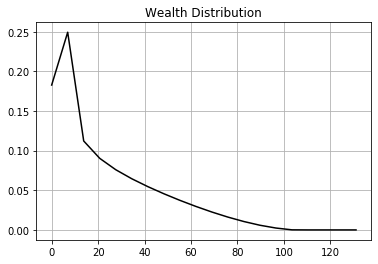

In [27]:
# plot wealth distribution under the baseline calibration
s = eq.dr.endo_grid.nodes() # grid for states (i.e the state variable--wealth in this case)
plt.plot(s[0:20], eq.μ.sum(axis=0)[0:20], color='black')   # I drop the last 10 grids when plotting since the probabilities of these levels of wealth are very close to zero. # The reason why I didn't use log for wealth is that taking log of a number which is extremely close to zero gets a very negative number 
plt.grid()
plt.title("Wealth Distribution")
plt.savefig('Figure_WealthDistribution.png')    # save the figure in the current directory 

# save the figure in the directory where TeX file is located.
save_results_to = 'Tex/Figures/'
plt.savefig(save_results_to + 'Figure_WealthDistribution.png', dpi = 300)